In [1]:
from coders import RMSPSK as Coder, BitStream
from coders.pipeline import Pipeline
from coders.ga import Population
import warnings
warnings.filterwarnings('ignore')

pipeline = Pipeline('.', no_lock=False)

gen_iter = 30
gen_time = 600

[7152] Lock acquired: 7


In [2]:
def coder_fitness(cutoff=0.95, size=300):
    def fn(coder, raw=False):
        input_source = BitStream(np.random.randint(2, size=size))
        r, q = pipeline.test(coder, input_source)
        if q < cutoff:
            r = 0
        if raw:
            return r, q
        return r * q ** 5
    return fn

In [3]:
population = Population(Coder, coder_fitness(0), 100, 0.2, 0.1)
population.evolve(10000, max_iter=2*gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.70)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.90)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.95)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.98)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)

Gen 1 grades: 3516/2643/1606
Gen average time: 0:00:12.871481
Gen 2 grades: 3461/2861/1978
Gen average time: 0:00:12.807430
Gen 3 grades: 3520/3053/2149
Gen average time: 0:00:12.847619
Gen 4 grades: 3878/3262/2326
Gen average time: 0:00:13.132976
Gen 5 grades: 3769/3279/2420
Gen average time: 0:00:13.149823
Gen 6 grades: 3834/3378/2749
Gen average time: 0:00:13.185414
Gen 7 grades: 4036/3413/2772
Gen average time: 0:00:13.175990
Gen 8 grades: 3812/3475/2773
Gen average time: 0:00:13.194420
Gen 9 grades: 4080/3633/2907
Gen average time: 0:00:12.970618
Gen 10 grades: 4200/3629/2862
Gen average time: 0:00:13.082307
Gen 11 grades: 3857/3678/3100
Gen average time: 0:00:12.909983
Gen 12 grades: 4375/3697/3267
Gen average time: 0:00:12.817281
Gen 13 grades: 3945/3659/3018
Gen average time: 0:00:12.630564
Gen 14 grades: 3984/3667/3066
Gen average time: 0:00:12.650667
Gen 15 grades: 3945/3654/3209
Gen average time: 0:00:12.294061
Gen 16 grades: 4155/3781/3277
Gen average time: 0:00:12.272953
G

In [4]:
sg = np.array([sorted(grades, reverse=True) for grades in population.grades])
top75 = sg[:, :3 * population.size // 4].mean(axis=1)
top25 = sg[:, :population.size // 4].mean(axis=1)
top1 = sg[:, :1].mean(axis=1)

out/RMSPSK_GA_2230697603648.pdf


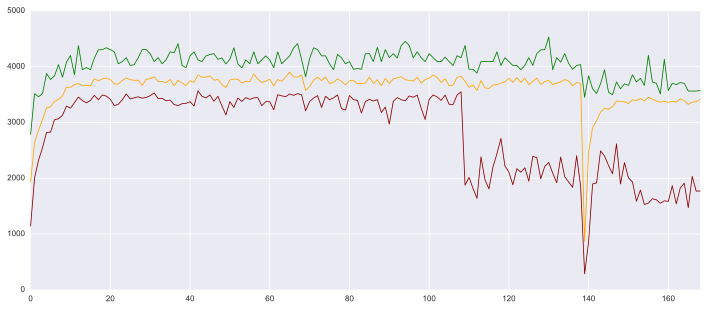

In [5]:
f = 'out/{}_GA_{}.pdf'.format(Coder.__name__, id(pipeline))
sns.tsplot(top75, color='darkred')
sns.tsplot(top25, color='orange')
sns.tsplot(top1, color='green')
print(f)
plt.savefig(f, bbox_inches='tight', pad_inches=0)
plt.show()

In [8]:
population.evolve(10000, max_iter=3*gen_iter, max_time=gen_time)

Gen 169 grades: 3678/3356/1145
Gen average time: 0:00:11.506166
Gen 170 grades: 3571/3309/1079
Gen average time: 0:00:11.976277
Gen 171 grades: 4080/3391/1561
Gen average time: 0:00:12.068088
Gen 172 grades: 3571/3364/1222
Gen average time: 0:00:12.101841
Gen 173 grades: 3623/3358/1174
Gen average time: 0:00:12.168352
Gen 174 grades: 3556/3390/1475
Gen average time: 0:00:12.271926
Gen 175 grades: 3714/3417/1523
Gen average time: 0:00:12.170606
Gen 176 grades: 3631/3410/1107
Gen average time: 0:00:11.948822
Gen 177 grades: 3631/3276/937
Gen average time: 0:00:11.717709
Gen 178 grades: 3868/3223/972
Gen average time: 0:00:11.435516
Gen 179 grades: 3623/3351/1453
Gen average time: 0:00:11.229372
Gen 180 grades: 3571/3328/1300
Gen average time: 0:00:11.038391
Gen 181 grades: 3511/3362/1050
Gen average time: 0:00:11.001886
Gen 182 grades: 3623/3333/918
Gen average time: 0:00:10.997442
Gen 183 grades: 3692/3453/1204
Gen average time: 0:00:10.963557
Gen 184 grades: 3631/3425/1217
Gen average 

In [9]:
sg = np.array([sorted(grades, reverse=True) for grades in population.grades])
top75 = sg[:, :3 * population.size // 4].mean(axis=1)
top25 = sg[:, :population.size // 4].mean(axis=1)
top1 = sg[:, :1].mean(axis=1)

out/RMSPSK_GA_2230697603648_2.pdf


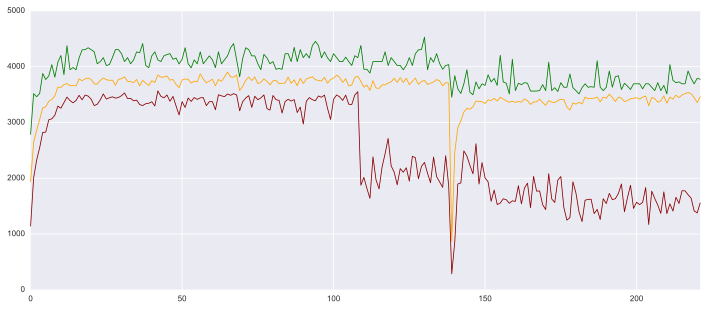

In [10]:
f = 'out/{}_GA_{}_2.pdf'.format(Coder.__name__, id(pipeline))
sns.tsplot(top75, color='darkred')
sns.tsplot(top25, color='orange')
sns.tsplot(top1, color='green')
print(f)
plt.savefig(f, bbox_inches='tight', pad_inches=0)
plt.show()

In [12]:
for c in population._sort(10000):
    print(*coder_fitness(0, 3000)(c, raw=True))
    # print(c)

3840.0 0.977
3840.0 0.9773333333333334
3918.3673469387754 0.9766666666666667
3840.0 0.969
3918.3673469387754 0.971
3840.0 0.9726666666666667
3840.0 0.973
3692.3076923076924 0.9756666666666667
3840.0 0.9786666666666667
3840.0 0.9683333333333334
3692.3076923076924 0.9793333333333333
3692.3076923076924 0.9776666666666667
3555.5555555555557 0.9806666666666667
3555.5555555555557 0.977
3692.3076923076924 0.9723333333333334
3692.3076923076924 0.9753333333333334
3692.3076923076924 0.9776666666666667
3692.3076923076924 0.9783333333333334
3692.3076923076924 0.9716666666666667
3622.6415094339623 0.9786666666666667
3692.3076923076924 0.972
3692.3076923076924 0.9773333333333334
3692.3076923076924 0.975
3692.3076923076924 0.979
3555.5555555555557 0.989
3555.5555555555557 0.9773333333333334
3490.909090909091 0.984
3428.5714285714284 0.986
3310.344827586207 0.9696666666666667
3310.344827586207 0.9856666666666667
2909.090909090909 0.9876666666666667
3096.7741935483873 0.9816666666666667
1846.1538461538

In [13]:
population.fn = coder_fitness(0.99)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)

Gen 222 grades: 3652/2295/574
Gen average time: 0:00:11.705650
Gen 223 grades: 3714/2732/948
Gen average time: 0:00:11.838398
Gen 224 grades: 3381/2759/1431
Gen average time: 0:00:11.779635
Gen 225 grades: 3439/2825/1384
Gen average time: 0:00:11.752292
Gen 226 grades: 3320/2819/1514
Gen average time: 0:00:11.706367
Gen 227 grades: 3433/2893/1490
Gen average time: 0:00:11.680094
Gen 228 grades: 3320/2896/1640
Gen average time: 0:00:11.588805
Gen 229 grades: 3320/2936/1463
Gen average time: 0:00:11.555893
Gen 230 grades: 3376/2890/1272
Gen average time: 0:00:11.565798
Gen 231 grades: 3095/2908/1431
Gen average time: 0:00:11.590282
Gen 232 grades: 3044/2888/1251
Gen average time: 0:00:11.557394
Gen 233 grades: 3571/3000/1361
Gen average time: 0:00:11.626466
Gen 234 grades: 3368/2923/1033
Gen average time: 0:00:11.613411
Gen 235 grades: 3258/2977/1205
Gen average time: 0:00:11.575657
Gen 236 grades: 3203/2936/980
Gen average time: 0:00:11.528595
Gen 237 grades: 3692/2952/1212
Gen average 

In [14]:
sg = np.array([sorted(grades, reverse=True) for grades in population.grades])
top75 = sg[:, :3 * population.size // 4].mean(axis=1)
top25 = sg[:, :population.size // 4].mean(axis=1)
top1 = sg[:, :1].mean(axis=1)

out/RMSPSK_GA_2230697603648_3.pdf


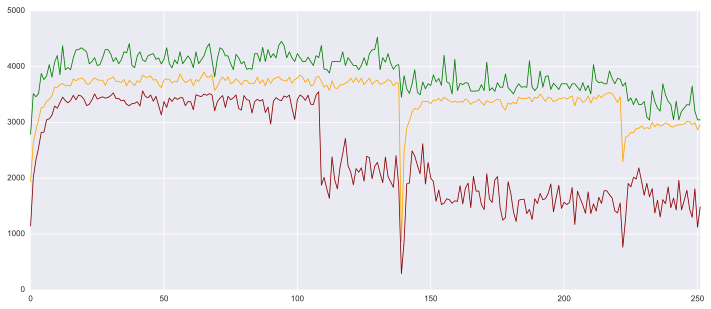

In [15]:
f = 'out/{}_GA_{}_3.pdf'.format(Coder.__name__, id(pipeline))
sns.tsplot(top75, color='darkred')
sns.tsplot(top25, color='orange')
sns.tsplot(top1, color='green')
print(f)
plt.savefig(f, bbox_inches='tight', pad_inches=0)
plt.show()

In [16]:
for c in population._sort(10000):
    print(*coder_fitness(0, 3000)(c, raw=True))
    # print(c)

3096.7741935483873 0.98
3000.0 0.992
3000.0 0.9883333333333333
3000.0 0.993
3047.6190476190477 0.9856666666666667
3047.6190476190477 0.9833333333333333
3047.6190476190477 0.9916666666666667
3047.6190476190477 0.9896666666666667
3047.6190476190477 0.986
3047.6190476190477 0.984
3047.6190476190477 0.9916666666666667
3000.0 0.988
3000.0 0.992
3047.6190476190477 0.991
3047.6190476190477 0.985
3047.6190476190477 0.9886666666666667
3096.7741935483873 0.9833333333333333
3000.0 0.9893333333333333
3000.0 0.9883333333333333
3000.0 0.9896666666666667
3047.6190476190477 0.99
3047.6190476190477 0.9863333333333333
3047.6190476190477 0.9876666666666667
3047.6190476190477 0.987
3047.6190476190477 0.983
3000.0 0.99
3000.0 0.9916666666666667
2823.529411764706 0.994
2953.846153846154 0.9896666666666667
2742.8571428571427 0.993
2704.225352112676 0.9946666666666667
2560.0 0.9976666666666667
2594.5945945945946 0.9956666666666667
2493.5064935064934 0.995
1669.5652173913043 0.9986666666666667
1500.0 0.9986666